In [115]:
import torch
import torch.nn.functional as F
import numpy as np
import os, argparse
from scipy import misc
from model import PolypSeg
from utils.dataloader import test_dataset
import cv2
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [116]:
testsize = 352
pth_path = "./model_pth/PolypSeg.e_120.07h59.pth"

In [117]:
transform = transforms.Compose([
    transforms.Resize((testsize, testsize)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])])
gt_transform = transforms.ToTensor()

In [118]:
model = PolypSeg()
model.load_state_dict(torch.load(pth_path))
model.cuda()
model.eval()

PolypSeg(
  (backbone): pvt_v2_b2(
    (patch_embed1): OverlapPatchEmbed(
      (proj): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed2): OverlapPatchEmbed(
      (proj): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed3): OverlapPatchEmbed(
      (proj): Conv2d(128, 320, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed4): OverlapPatchEmbed(
      (proj): Conv2d(320, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
    (block1): ModuleList(
      (0): Block(
        (norm1): LayerNorm((64,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (q): Linear(in_features=64, out_feature

In [119]:
input_img_path = r".\dataset\TestDataset\ETIS-LaribPolypDB\images\79.png"
gt_path = r".\dataset\TestDataset\ETIS-LaribPolypDB\masks\79.png"

with open(input_img_path, 'rb') as f:
    image = Image.open(f)
    image = image.convert('RGB')

with open(gt_path, 'rb') as f:
    gt = Image.open(f)
    gt = gt.convert('L')

In [120]:
# crop_region1 = [440,348,850,655]
crop_region2 = [441,205,1040,825]
# x1, y1, x2, y2 = crop_region2

# image = image.crop((x1, y1, x2, y2))
# gt = gt.crop((x1, y1, x2, y2))

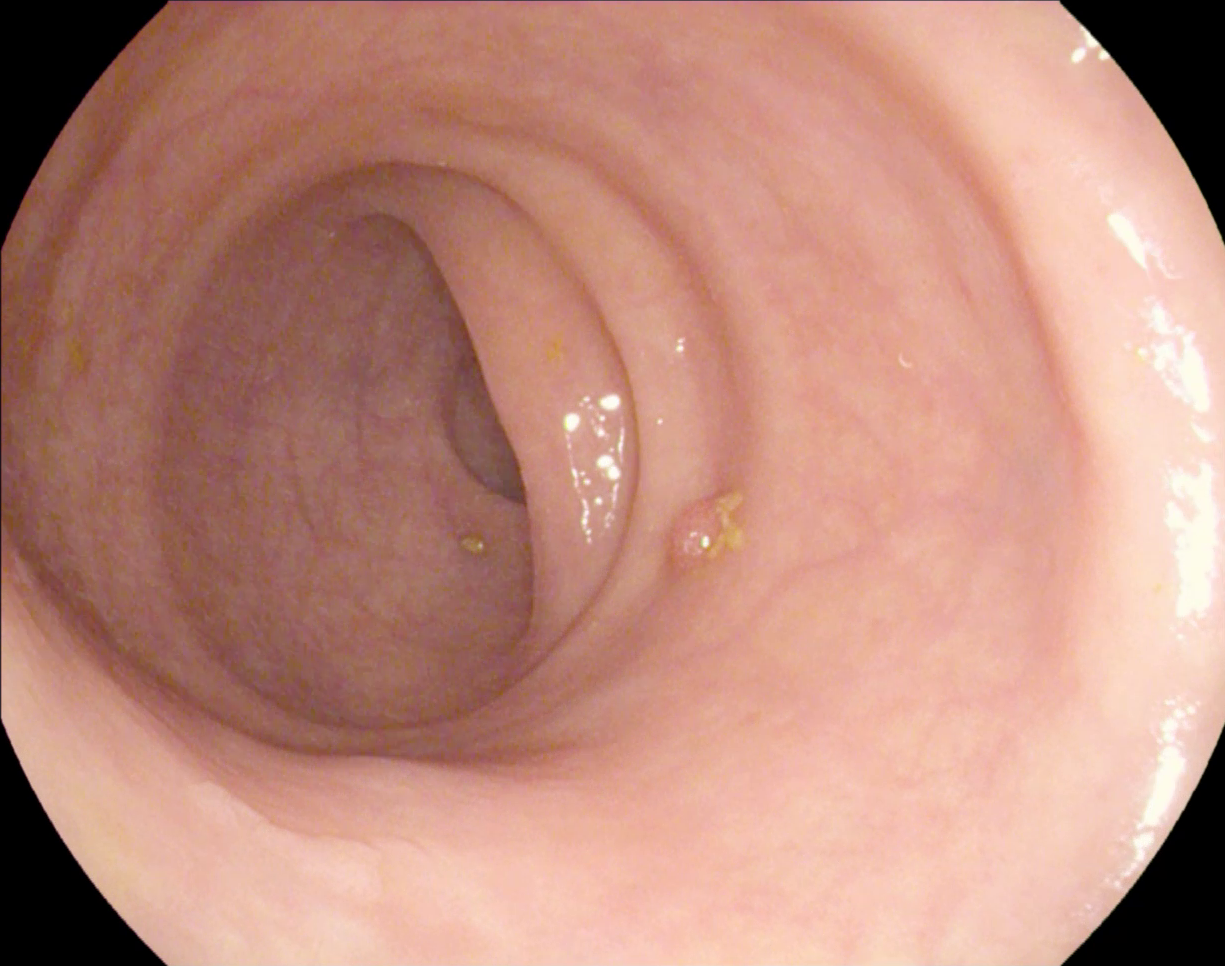

In [121]:
image

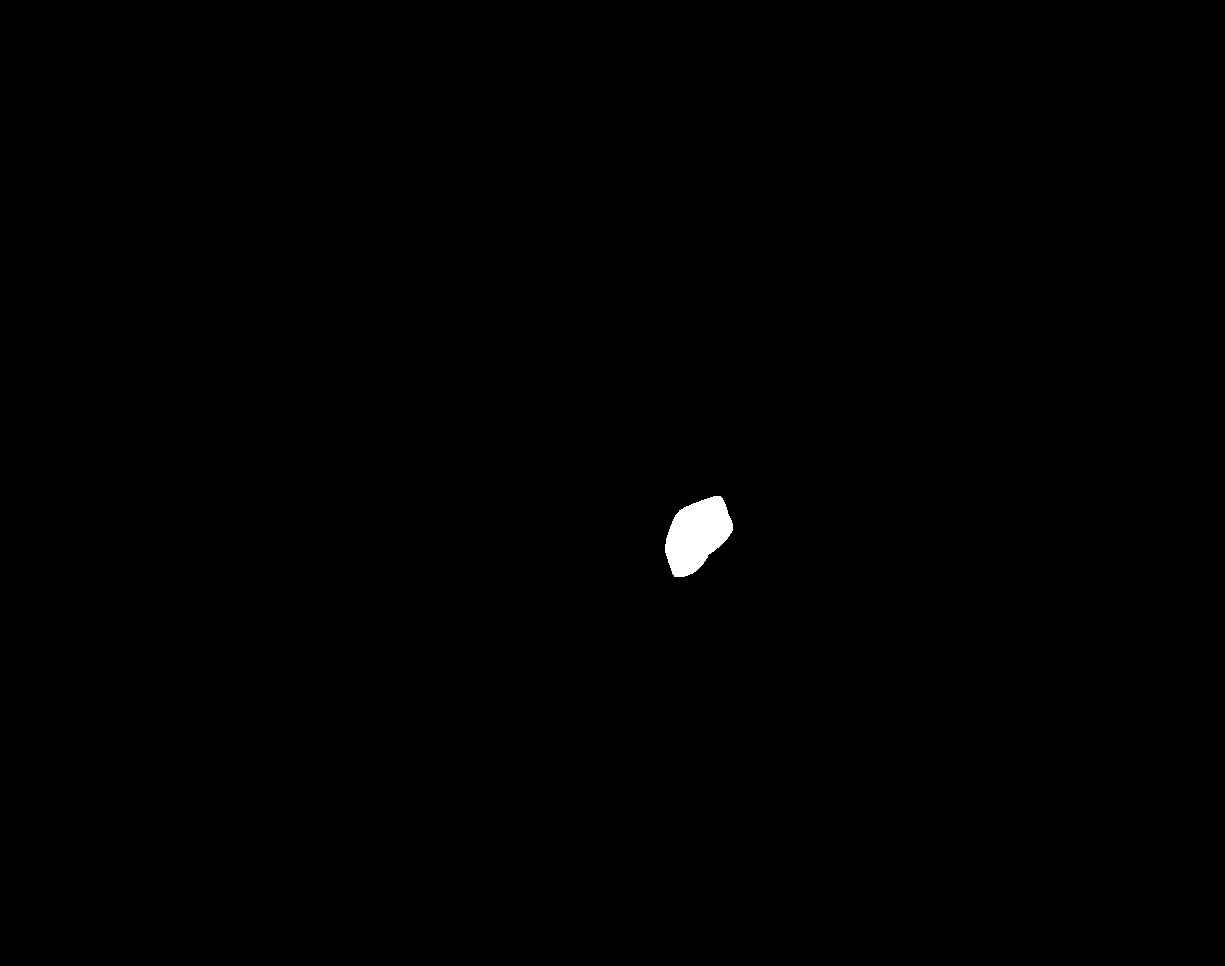

In [122]:
gt

In [123]:
def predict(model, image, gt):
    gt = np.asarray(gt, np.float32)
    gt /= (gt.max() + 1e-8)
    image = image.cuda()
    P1 = model(image)
    res = F.upsample(P1, size=gt.shape, mode='bilinear', align_corners=False)
    res = res.sigmoid().data.cpu().numpy().squeeze()
    res = (res - res.min()) / (res.max() - res.min() + 1e-8)
    return res


In [124]:
image = transform(image).unsqueeze(0)
res = predict(model, image, gt)

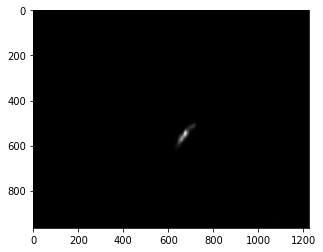

In [125]:
plt.imshow(res, cmap='gray')